In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'C:\Users\I.katsantonis\Desktop\Data Set\cost_of_living_data.csv')

In [4]:
df.head(10)

,Country,GDP_per_capita,Cost_of_Living,Purchasing_Power
0,Norway,89000,70,120
1,Greece,21000,51,48
2,Switzerland,94000,78,130
3,India,7000,24,25
4,USA,65000,72,110
5,Germany,46000,60,100
6,Brazil,15000,35,55
7,South Africa,13000,38,45
8,Japan,42000,58,90
9,Turkey,10500,40,50


In [5]:
df.isna().count()

Country             10
GDP_per_capita      10
Cost_of_Living      10
Purchasing_Power    10
dtype: int64

## STEP 2: Descriptive Statistics and Data Exploration
Goal: Understand the distribution of the variables

In [6]:
df.describe()

,GDP_per_capita,Cost_of_Living,Purchasing_Power
count,10.000000,10.000000,10.000000
mean,40250.000000,52.600000,77.300000
std,32754.346616,17.982708,36.857232
min,7000.000000,24.000000,25.000000
25%,13500.000000,38.500000,48.500000
50%,31500.000000,54.500000,72.500000
75%,60250.000000,67.500000,107.500000
max,94000.000000,78.000000,130.000000


In [7]:
df.loc[df['GDP_per_capita'].idxmax()]

Country             Switzerland
GDP_per_capita            94000
Cost_of_Living               78
Purchasing_Power            130
Name: 2, dtype: object

In [8]:
df.loc[df['GDP_per_capita'].idxmin()]

Country             India
GDP_per_capita       7000
Cost_of_Living         24
Purchasing_Power       25
Name: 3, dtype: object

## Visualize Relationships
Goal: See how our variables are related

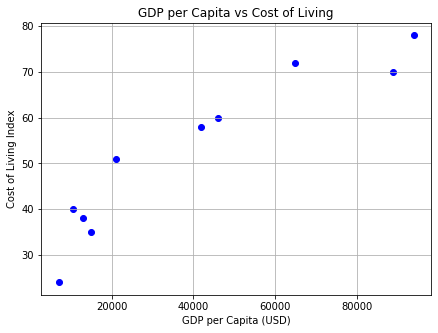

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(df['GDP_per_capita'], df['Cost_of_Living'], color='blue')
plt.title('GDP per Capita vs Cost of Living')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Cost of Living Index')
plt.grid(True)
plt.show()

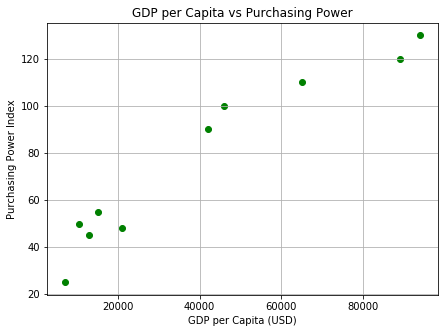

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df['GDP_per_capita'],df['Purchasing_Power'],color='green')
plt.title('GDP per Capita vs Purchasing Power')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Purchasing Power Index')
plt.grid(True)
plt.show()

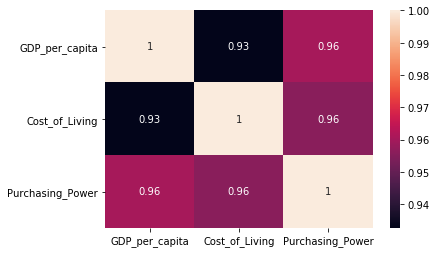

In [11]:
sns.heatmap(df.corr(),annot=True)

## STEP 4: Build a Simple Linear Regression Model
 Goal: Predict Cost of Living using GDP per Capita

In [12]:
# Prepare data
x = df[['GDP_per_capita']]
y = df['Cost_of_Living']

In [13]:
# Create and fit model
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predictions
df['Predicted_Cost'] = model.predict(x)

In [15]:
print("Intercept (b):", model.intercept_)
print("Slope (w):", model.coef_[0])

Intercept (b): 31.988581785228824
Slope (w): 0.0005120849245905882


In [16]:
df

,Country,GDP_per_capita,Cost_of_Living,Purchasing_Power,Predicted_Cost
0,Norway,89000,70,120,77.564140
1,Greece,21000,51,48,42.742365
2,Switzerland,94000,78,130,80.124565
3,India,7000,24,25,35.573176
4,USA,65000,72,110,65.274102
5,Germany,46000,60,100,55.544488
6,Brazil,15000,35,55,39.669856
7,South Africa,13000,38,45,38.645686
8,Japan,42000,58,90,53.496149
9,Turkey,10500,40,50,37.365473


# Step 5: Model Evaluation - R^2 and Residuals

## R^2 Score

In [17]:
from sklearn.metrics import r2_score
r2 =  r2_score(df['Cost_of_Living'],df['Predicted_Cost'])
print('r2 Score:', r2)

r2 Score: 0.869984850755279


In [21]:
df['residual'] = df['Cost_of_Living'] - df['Predicted_Cost']
df[['Country','Cost_of_Living','Predicted_Cost','residual']]

,Country,Cost_of_Living,Predicted_Cost,residual
0,Norway,70,77.564140,-7.564140
1,Greece,51,42.742365,8.257635
2,Switzerland,78,80.124565,-2.124565
3,India,24,35.573176,-11.573176
4,USA,72,65.274102,6.725898
5,Germany,60,55.544488,4.455512
6,Brazil,35,39.669856,-4.669856
7,South Africa,38,38.645686,-0.645686
8,Japan,58,53.496149,4.503851
9,Turkey,40,37.365473,2.634527
